In [21]:
import pandas as pd
df = pd.read_csv('Tasla_Stock_Updated_V2.csv')
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500


In [18]:
df.shape

(2274, 7)

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2274 non-null   int64  
 1   Date        2274 non-null   object 
 2   Open        2274 non-null   float64
 3   High        2274 non-null   float64
 4   Low         2274 non-null   float64
 5   Close       2274 non-null   float64
 6   Volume      2274 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 124.5+ KB
None


In [9]:
df.describe(include = 'all')

,Unnamed: 0,Date,Open,High,Low,Close,Volume
count,2274.000000,2274,2274.000000,2274.000000,2274.000000,2274.000000,2.274000e+03
unique,NaN,2274,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-01-02,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN
mean,1136.500000,NaN,103.493730,105.771617,101.036327,103.461794,1.142089e+08
std,656.591578,NaN,111.136174,113.606095,108.399966,111.032019,7.688430e+07
min,0.000000,NaN,9.488000,10.331333,9.403333,9.578000,1.062000e+07
25%,568.250000,NaN,16.669833,16.933332,16.468833,16.693666,6.637762e+07
50%,1136.500000,NaN,23.221334,23.554000,22.842334,23.197333,9.359855e+07
75%,1704.750000,NaN,215.272503,219.629173,208.983334,215.227497,1.338214e+08


In [22]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.reset_index(drop=True, inplace=True)
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2274 non-null   datetime64[ns]
 1   Open    2274 non-null   float64       
 2   High    2274 non-null   float64       
 3   Low     2274 non-null   float64       
 4   Close   2274 non-null   float64       
 5   Volume  2274 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 106.7 KB
None
        Date       Open       High        Low      Close    Volume
0 2015-01-02  14.858000  14.883333  14.217333  14.620667  71466000
1 2015-01-05  14.303333  14.433333  13.810667  14.006000  80527500
2 2015-01-06  14.004000  14.280000  13.614000  14.085333  93928500
3 2015-01-07  14.223333  14.318667  13.985333  14.063333  44526000
4 2015-01-08  14.187333  14.253333  14.000667  14.041333  51637500


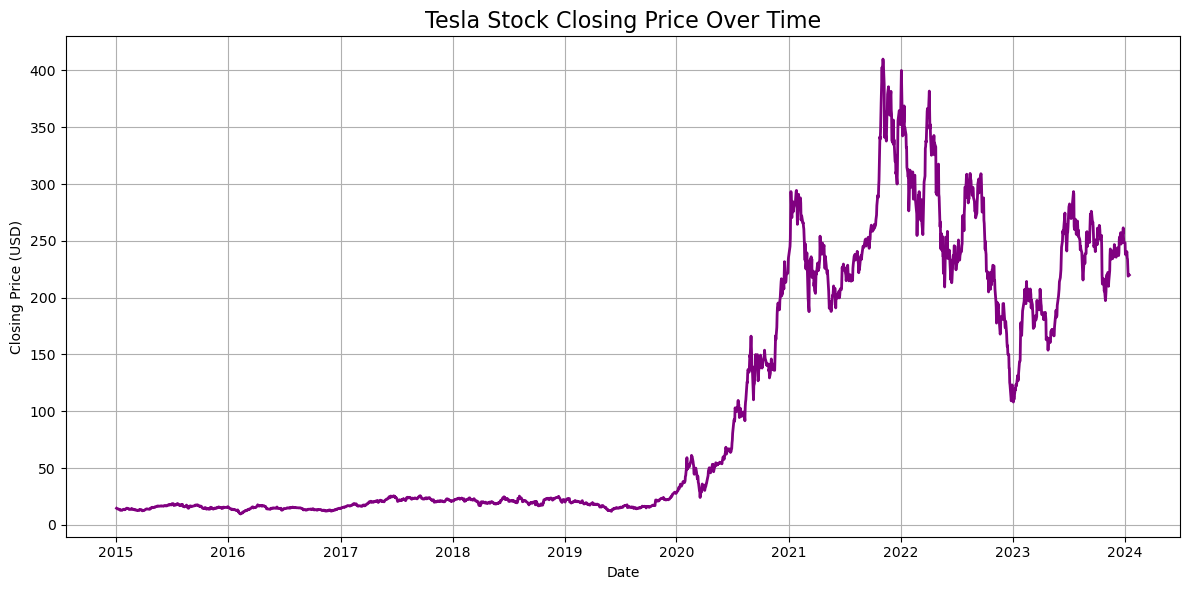

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='purple', linewidth=2)
plt.title('Tesla Stock Closing Price Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


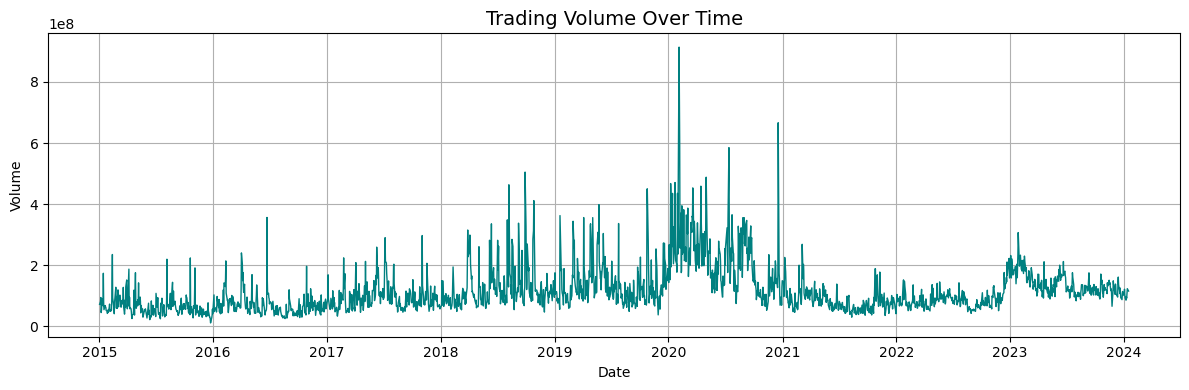

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Volume'], color='teal', linewidth=1)
plt.title('Trading Volume Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()


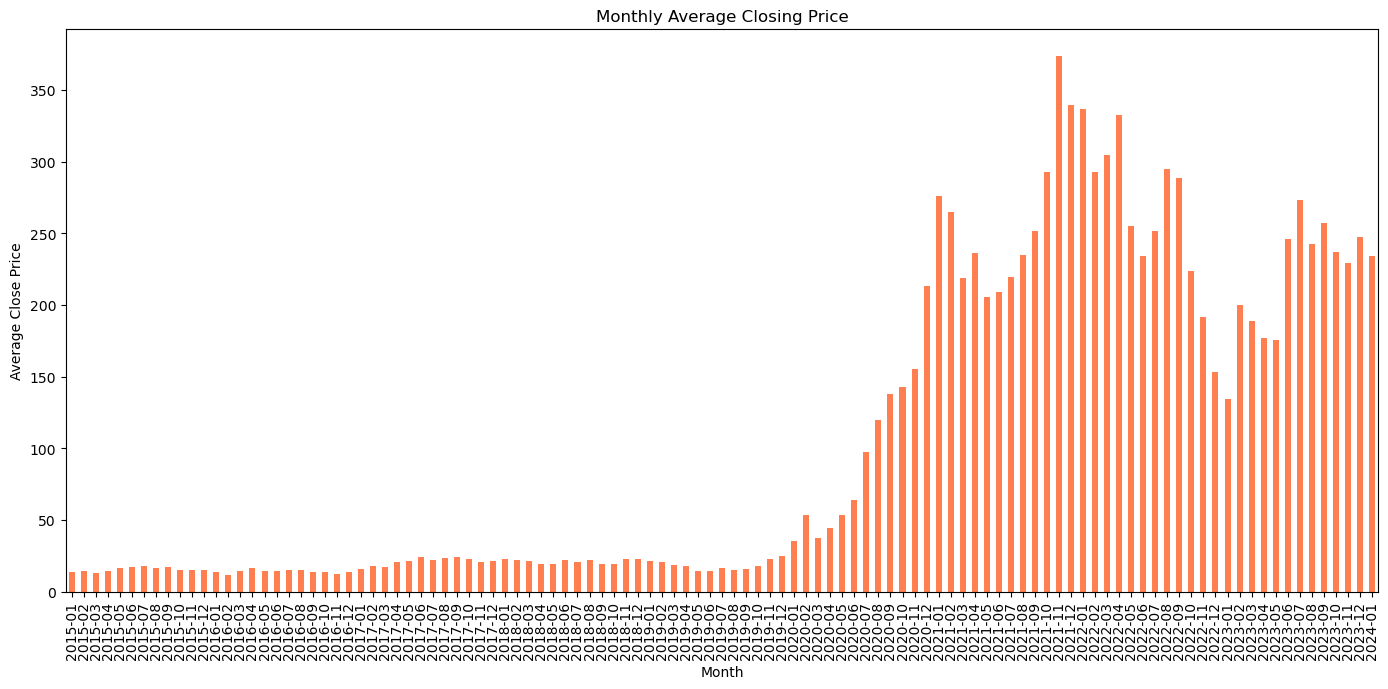

In [24]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Month')['Close'].mean()

monthly_avg.plot(kind='bar', figsize=(14, 7), color='coral')
plt.title('Monthly Average Closing Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


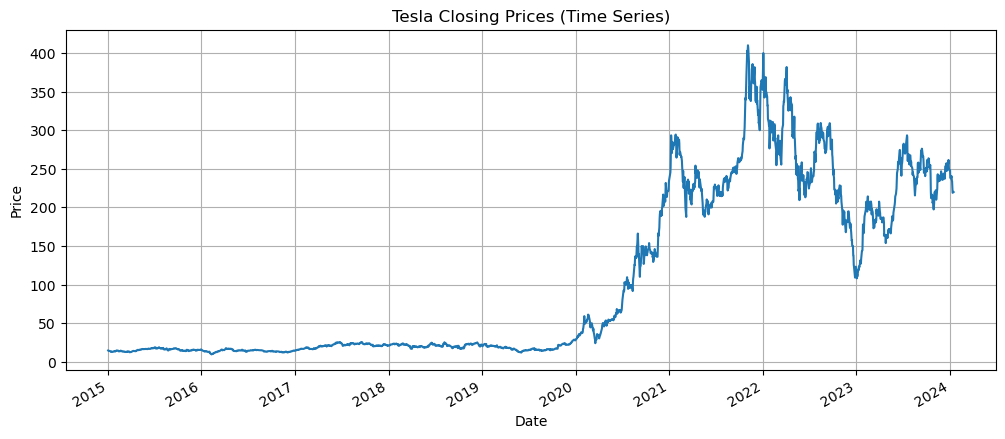

In [25]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df.set_index('Date', inplace=True)
ts = df['Close']

ts.plot(figsize=(12, 5), title='Tesla Closing Prices (Time Series)', ylabel='Price')
plt.grid(True)
plt.show()


In [26]:
train = ts[:-180]
test = ts[-180:]


C:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


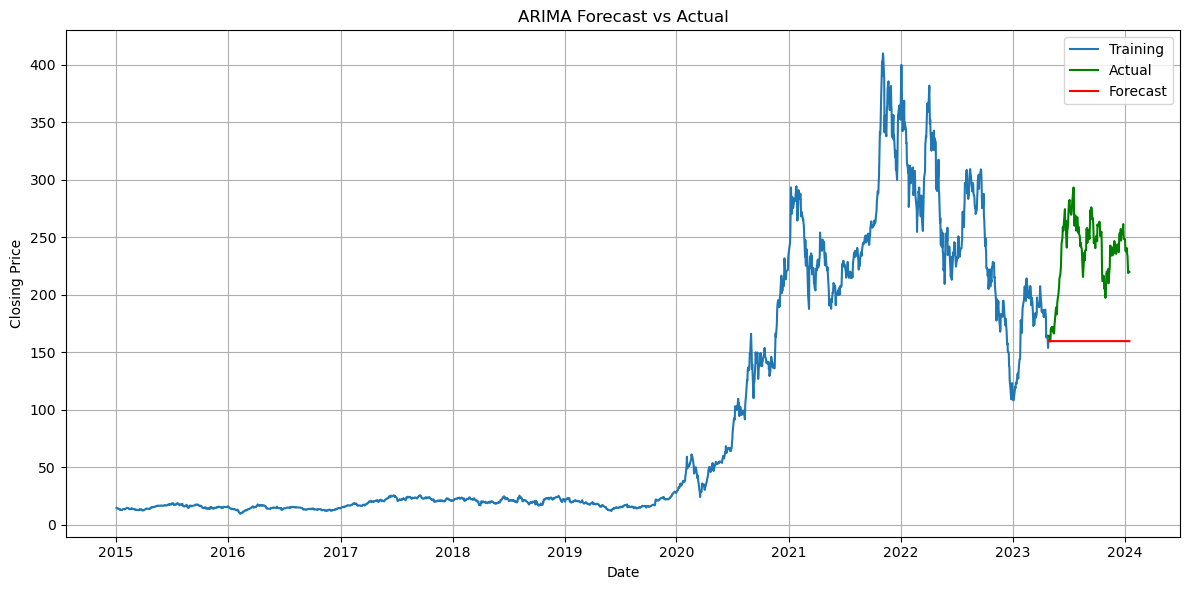

In [27]:
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=180)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
forecast_df = pd.DataFrame({'Date': test.index, 'Forecast': forecast})
forecast_df.to_csv("forecast_output.csv", index=False)